In [50]:
from scipy import stats
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [51]:
df_sheet_all = pd.read_excel('Weatherdata.xlsx', sheet_name=None)
df=df_sheet_all['Apr2022']

In [52]:
df=pd.concat([df,df_sheet_all['March2022']])

In [53]:
df=pd.concat([df,df_sheet_all['Feb2022']])

In [54]:
df=pd.concat([df,df_sheet_all['Jan2022']])

In [55]:
df=pd.concat([df,df_sheet_all['Dec2021']])

In [56]:
for key in list(df_sheet_all):
    df=pd.concat([df,df_sheet_all[key]])

In [57]:
df=df.reset_index()

In [58]:
df.drop('index',axis=1,inplace=True)

In [59]:
df.drop('Precipitation',axis=1,inplace=True)

In [60]:
df.head()

,Date,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
0,2022-04-01,87.9,31.3,13.4,5.7,29.2,19.010857
1,2022-04-02,91.8,33.0,14.7,5.1,27.7,20.749143
2,2022-04-03,90.2,34.0,14.2,6.6,29.1,16.885714
3,2022-04-04,93.2,31.4,11.8,8.8,29.1,19.627429
4,2022-04-05,92.5,24.9,9.4,8.0,29.1,18.929429


In [61]:
df.describe()

,AvgTemp,AverageDew,Humidity,Wind,Pressure,Solar(PV)
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,77.476937,35.866605,26.076937,10.191513,29.180535,24.290618
std,14.657585,8.944349,11.840176,3.677423,0.287500,7.464716
min,49.500000,8.700000,7.000000,4.400000,26.900000,8.581429
25%,63.400000,29.125000,16.525000,8.200000,29.100000,17.582071
50%,78.500000,35.100000,23.350000,10.100000,29.200000,23.638571
75%,91.275000,42.800000,35.175000,12.000000,29.300000,31.542857
max,102.700000,63.900000,63.000000,72.900000,29.600000,40.038857


In [62]:
df.isna().sum()

Date          0
AvgTemp       0
AverageDew    0
Humidity      0
Wind          0
Pressure      0
Solar(PV)     0
dtype: int64

<AxesSubplot:>

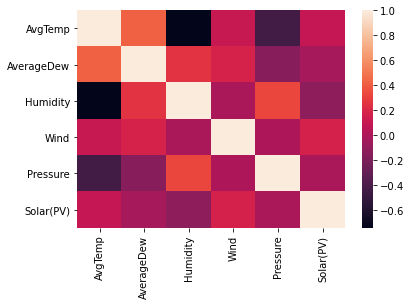

In [63]:
sns.heatmap(df.corr())

<AxesSubplot:>

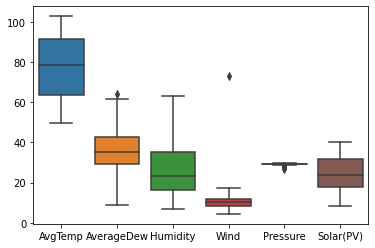

In [64]:
sns.boxplot(data=df)

In [65]:
df=df[df.Wind<20]

In [66]:
df=df[df.AverageDew>15]

In [67]:
df=df[df.Pressure>28.5]

In [68]:
df=df[df.Humidity<49]

In [69]:
df.to_csv('weaterdata.csv')

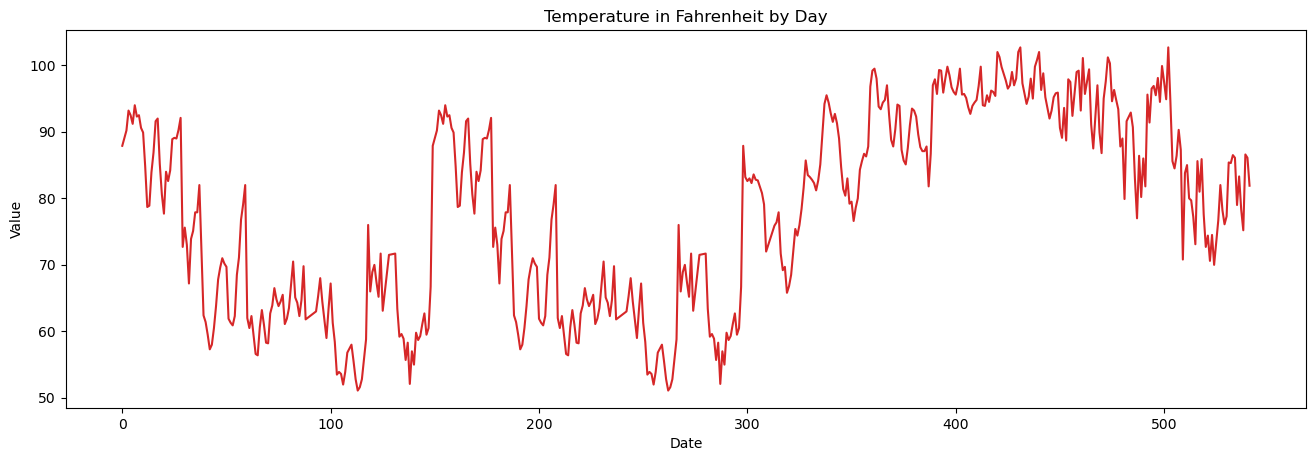

In [82]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100,color='tab:red'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.AvgTemp, title='Temperature in Fahrenheit by Day')   

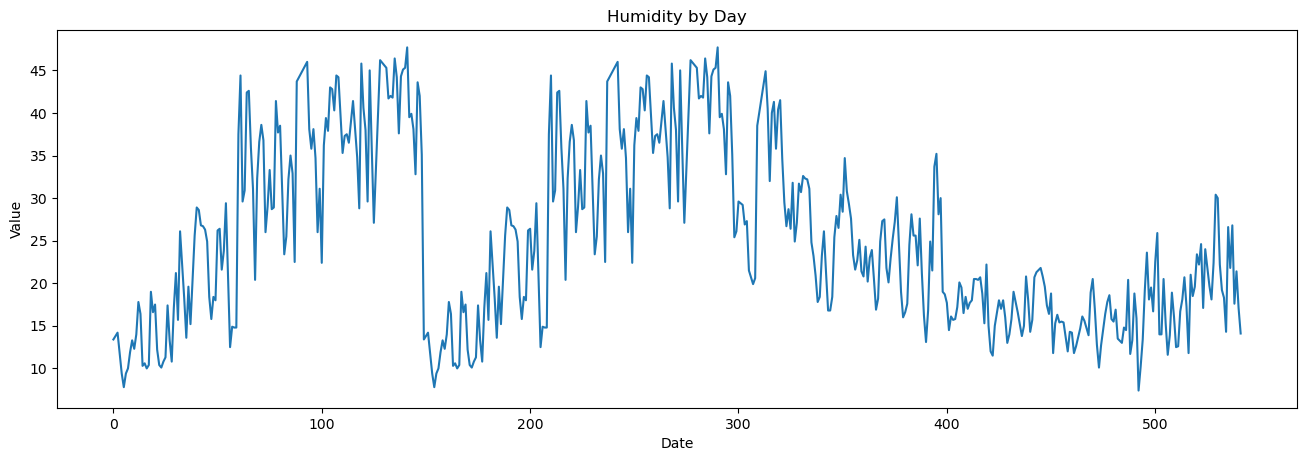

In [93]:
plot_df(df, x=df.index, y=df.Humidity, title='Humidity by Day',color='tab:blue')   

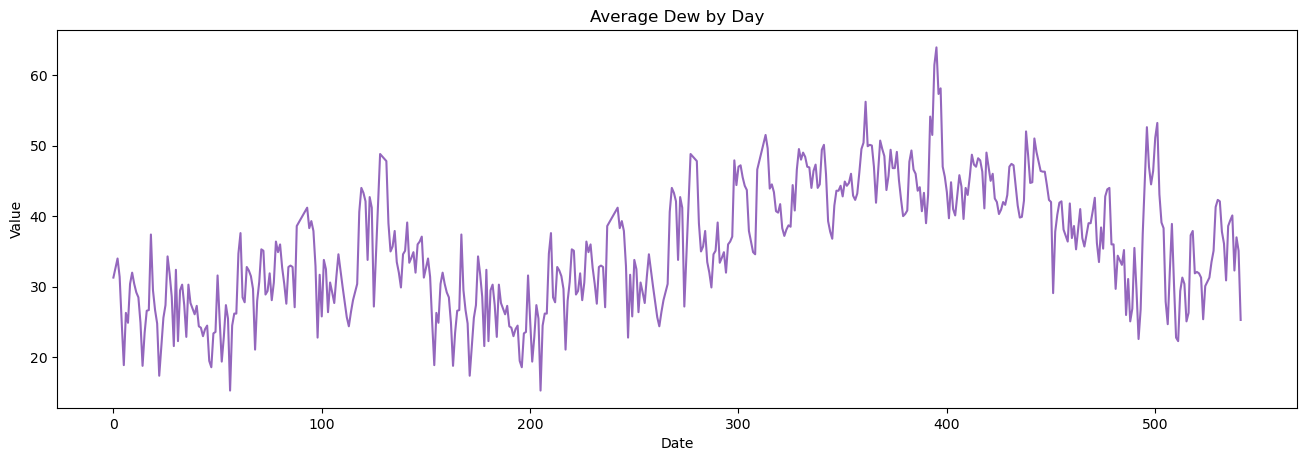

In [92]:
plot_df(df, x=df.index, y=df.AverageDew, title='Average Dew by Day',color='tab:purple')   

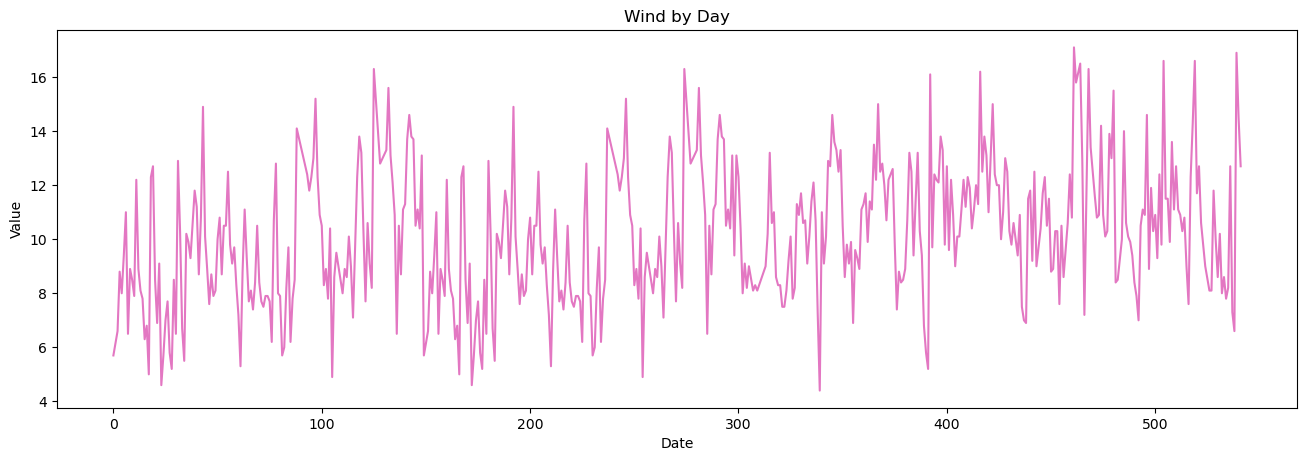

In [90]:
plot_df(df, x=df.index, y=df.Wind, title='Wind by Day',color='tab:pink')   

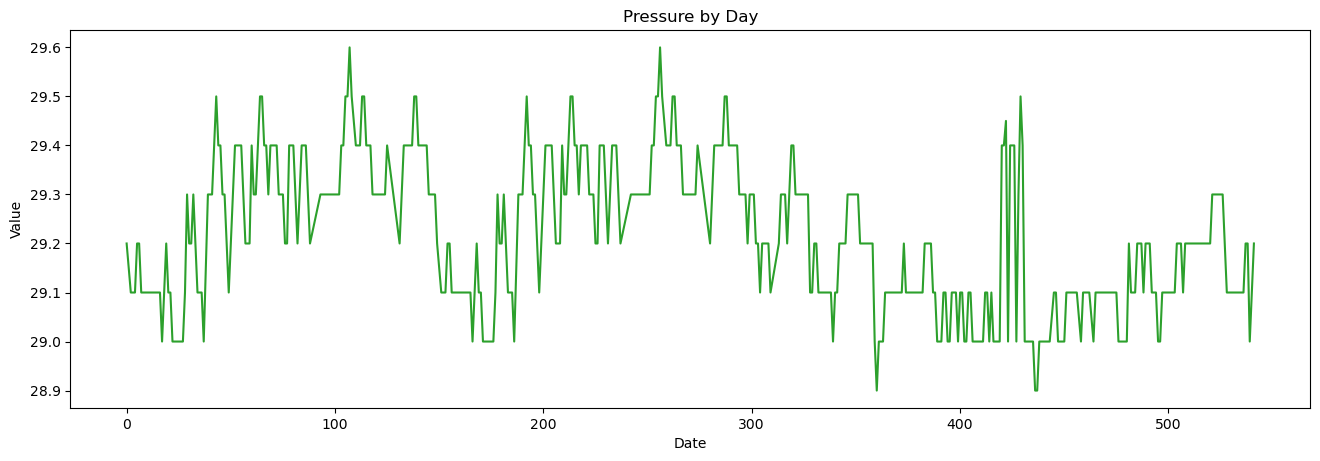

In [91]:
plot_df(df, x=df.index, y=df.Pressure, title='Pressure by Day',color='tab:green')   

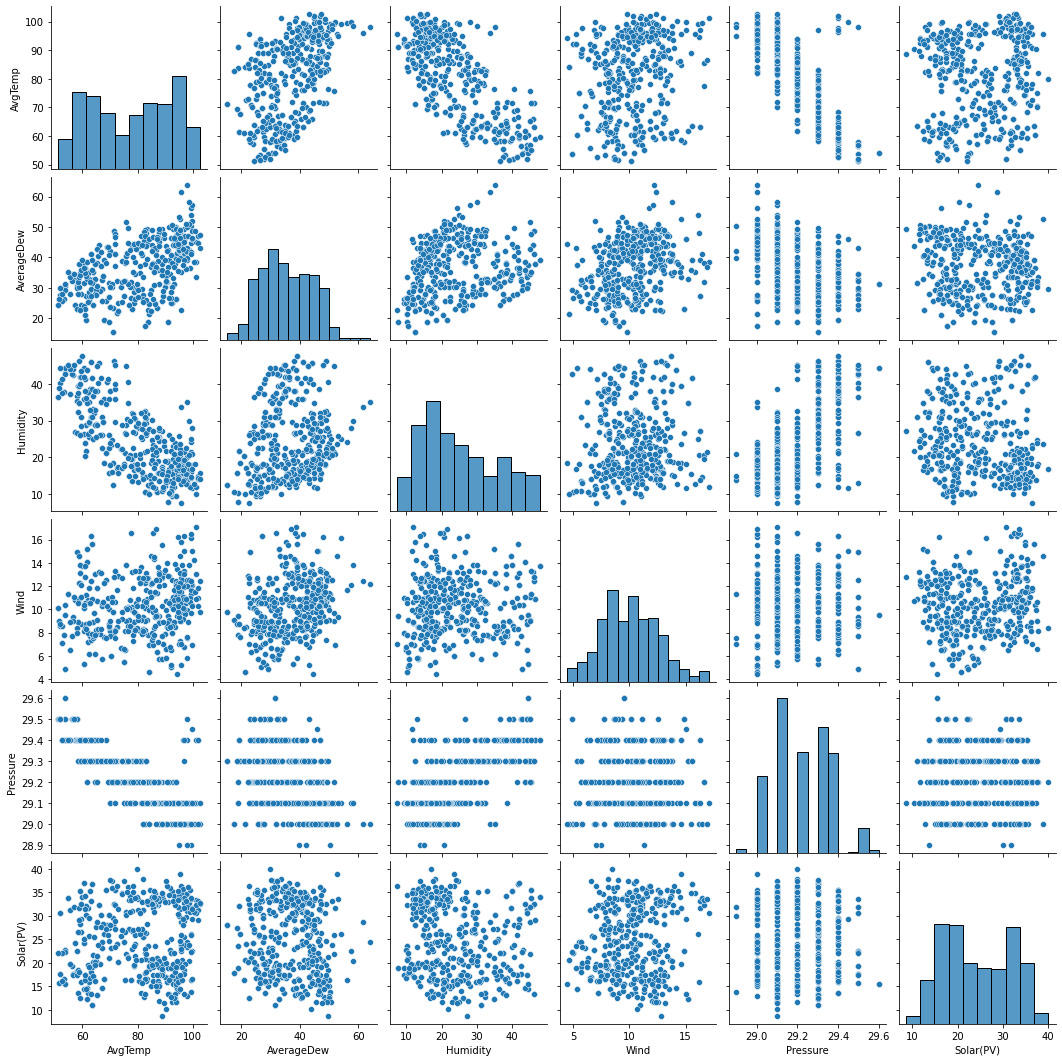

In [74]:
sns.pairplot(df)


In [94]:
y=df['Solar(PV)']

In [95]:
x=df.drop(['Date','Solar(PV)'],axis=1)

In [133]:
from sklearn.metrics import mean_squared_error


In [134]:
from sklearn.metrics import r2_score


In [102]:
x2=x.drop('Pressure',axis=1)

In [103]:
x2

,AvgTemp,AverageDew,Humidity,Wind
0,87.9,31.3,13.4,5.7
2,90.2,34.0,14.2,6.6
3,93.2,31.4,11.8,8.8
4,92.5,24.9,9.4,8.0
5,91.2,18.9,7.8,9.4
...,...,...,...,...
537,78.3,40.1,26.8,7.3
538,75.2,32.3,17.6,6.6
539,86.6,37.0,21.4,16.9
540,86.1,35.1,17.1,14.5


In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [109]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [110]:
 regr.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [111]:
y_pred3=regr.predict(x)

In [112]:
r2_score(y_pred3,y)

-2.3483995930372856

In [113]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x,y)

KNeighborsRegressor(n_neighbors=2)

In [114]:
y_pred4=neigh.predict(x)

In [115]:
r2_score(y_pred4,y)

0.8197535630184007

In [116]:
from scipy.stats import pearsonr
corr,_=pearsonr(df.AvgTemp,df['Solar(PV)'])

In [117]:
corr

0.06367223589964553

In [118]:
from scipy.stats import pearsonr
corr1,_=pearsonr(df.AverageDew,df['Solar(PV)'])

In [119]:
corr1

-0.040829665968515734

In [120]:
corr2,_=pearsonr(df.Humidity,df['Solar(PV)'])

In [121]:
corr2

-0.10142762093250687

In [122]:
corr3,_=pearsonr(df.Wind,df['Solar(PV)'])

In [123]:
corr3

0.19261185249907012

In [124]:
corr4,_=pearsonr(df.Pressure,df['Solar(PV)'])

In [125]:
corr4

0.0007471426359986376

In [128]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=2, random_state=0)
forest.fit(x, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [129]:
y_pred5=forest.predict(x)

In [130]:
r2_score(y_pred5,y)

-15.871916260180441

In [131]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x, y)
y_pred6=reg.predict(x)

In [132]:
r2_score(y_pred6,y)

0.2770364371054185

# Additions
- MLP model,Polynoimal Regression
- RNN, Quantile Regression, UBR, Lasso, Ridge